In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris = pd.DataFrame(iris.data)

In [4]:
iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

# Paso 1: Centrado de los datos

In [7]:
sc = StandardScaler()

In [9]:
iris_ec = sc.fit_transform(iris)

In [11]:
iris_ec = pd.DataFrame(iris_ec)

In [12]:
iris_ec

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

In [15]:
pca_iris = pca.fit_transform(iris_ec)

In [17]:
df_pca = pd.DataFrame(pca_iris)

In [18]:
df_pca

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [19]:
df_pca.corr()

,0,1,2,3
0,1.000000e+00,1.842693e-16,-9.386813e-17,-1.580367e-17
1,1.842693e-16,1.000000e+00,-1.024962e-16,-2.433136e-17
2,-9.386813e-17,-1.024962e-16,1.000000e+00,-7.550949e-17
3,-1.580367e-17,-2.433136e-17,-7.550949e-17,1.000000e+00


In [20]:
pca2 = PCA()

In [21]:
pca2 = pca2.fit(iris_ec)

In [22]:
pca2

PCA()

In [23]:
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [24]:
pca2.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

# Ejemplo KMeans con PCA

In [26]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [27]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df['Gender'] = pd.get_dummies(df.Gender).values[:,0]

In [30]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [31]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [32]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [35]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [39]:
from sklearn import preprocessing

In [40]:
X = preprocessing.normalize(df)

In [41]:
X

array([[0.        , 0.41392469, 0.32678265, 0.84963489],
       [0.        , 0.24702464, 0.17644617, 0.95280931],
       [0.03798686, 0.75973718, 0.60778974, 0.22792115],
       [0.01220329, 0.28067571, 0.19525267, 0.93965346],
       [0.01872843, 0.58058136, 0.31838332, 0.74913723],
       [0.01235604, 0.27183291, 0.2100527 , 0.93905914],
       [0.0251101 , 0.87885343, 0.45198176, 0.15066059],
       [0.0101587 , 0.23365009, 0.18285659, 0.95491775],
       [0.        , 0.95768043, 0.28431138, 0.04489127],
       [0.01245532, 0.37365957, 0.23665106, 0.89678296],
       [0.        , 0.94319433, 0.26747302, 0.19708538],
       [0.00937079, 0.3279777 , 0.17804504, 0.92770835],
       [0.01583119, 0.918209  , 0.31662379, 0.23746785],
       [0.01203335, 0.28880051, 0.24066709, 0.9265683 ],
       [0.        , 0.84047507, 0.45431085, 0.29530205],
       [0.        , 0.26063351, 0.23693955, 0.93591123],
       [0.0185952 , 0.650832  , 0.3904992 , 0.650832  ],
       [0.        , 0.27743014,

In [42]:
model = KMeans()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

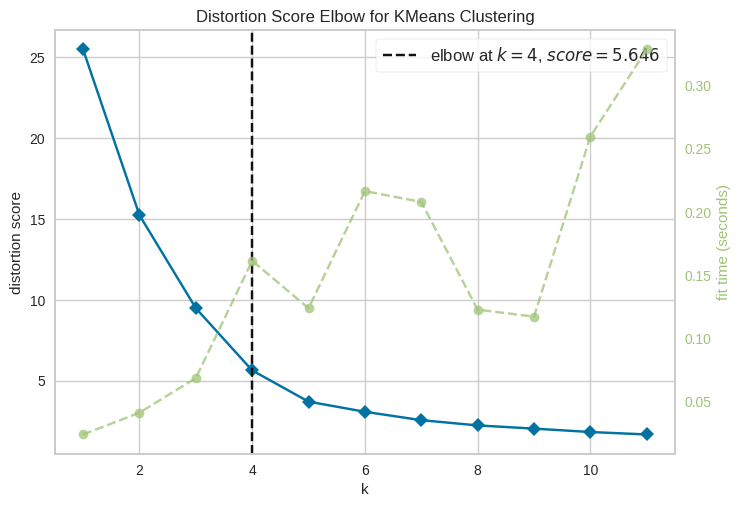

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
visualizador = KElbowVisualizer(model, k = (1,12))
visualizador.fit(X)
visualizador.show()